In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv("C:/Users/HP/Documents/DATA SCIENCE/Data analyst internship/task5/Titanic-Dataset.csv")
print(df)

## a.basic checks
print(df.info()) # structure, data types, nulls
print(df.describe())
print(df.dtypes)
print('______________________________________')

df.fillna(df.mean(numeric_only=True), inplace=True)

for col in df.select_dtypes(include=['object','category']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)        ## mode()[0]- most frequent value
print(df.isnull().sum())   ## to check the result
print('______________________________________')

# Value counts for categorical features
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())   

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

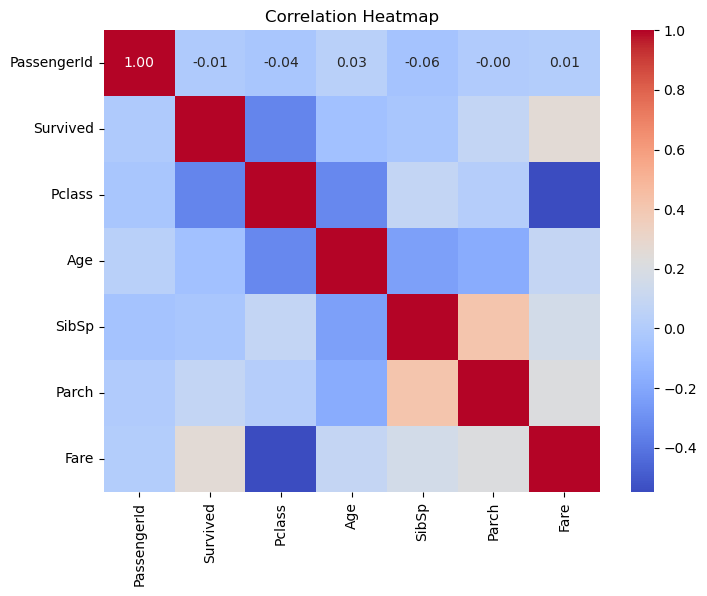

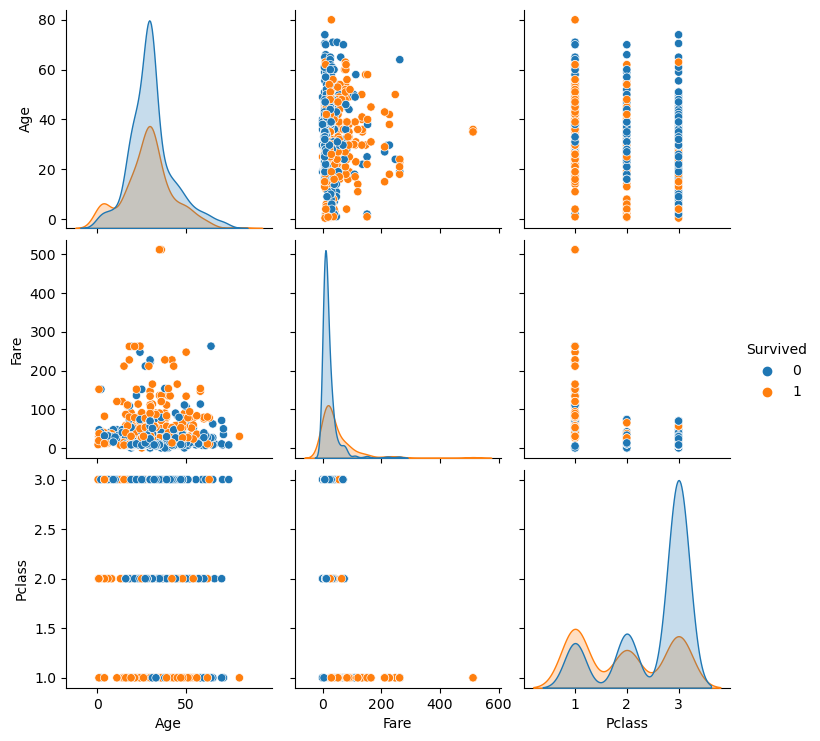

In [26]:
# b.heatmap and pairplot (correlation analysis)
# heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sn.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived')
plt.show()

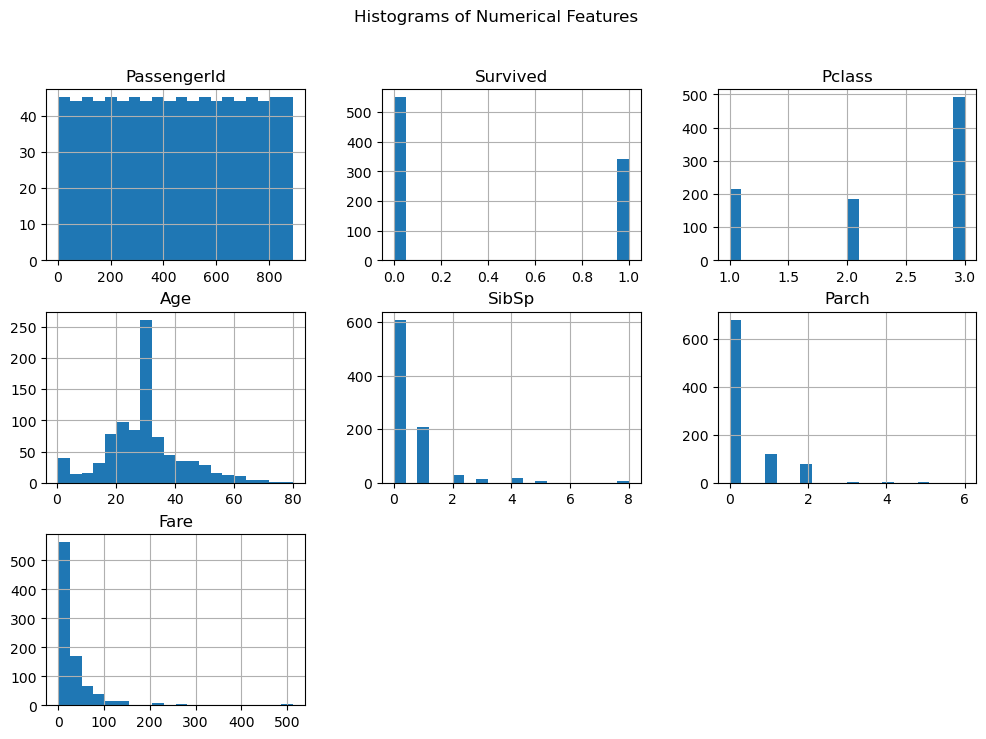

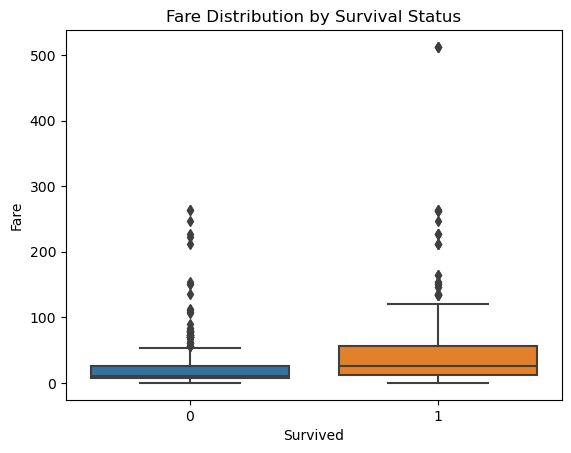

In [19]:
# d Histograms for numerical variables (univariate analysis)
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplot: Fare vs Survived (bivariate analysis)
sn.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival Status")
plt.show()

# Scatterplot: Age vs Fare
sn.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title("Age vs Fare colored by Survival")
plt.show()

In [ ]:
# c. Identify relationships and trends

# (univariate analysis)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# (bivariate anlaysis)
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Key Relationships & Trends

# - Gender & Survival: Female passengers had a much higher survival rate than males.
# - Class & Survival: First-class passengers survived more often than second or third class.
# - Age & Survival: Younger passengers showed slightly higher survival chances, especially children.
# - Fare & Survival: Higher fares were linked to higher survival probability, hinting at socio-economic influence.
# - Correlations:
# - Passenger Class ↔ Survival: Negative correlation (-0.338) — lower class = lower survival rate.
# - Fare ↔ Survival: Positive correlation (0.257) — higher fare = higher survival rate.

In [ ]:
# e) Observations
# - Higher survival rate for females than males.
# - First-class passengers had the highest survival rate.
# - Age distribution shows most passengers were 20–40 years old.
# - Fare is right-skewed — some passengers paid extremely high fares.
# - Survival is positively correlated with Fare and negatively with Pclass.




In [ ]:
# f) Summary of Findings
# 1. Class and Gender were strong determinants of survival.
# 2. High fares and lower classes show different distributions in survival.
# 3. Missing values found in 'Age' and 'Cabin' need imputation or removal.
# 4. Fare distribution is skewed — consider log transformation before modeling.
